# EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_homicidios = pd.read_csv('C:\\Users\\fedez\\OneDrive\\Escritorio\\PI_02.zip\\PI-Data Analytics\\Data\\homicidios.csv')

In [13]:
# Se configura para que se muestre la totalidad de las columnas del dataframe.
pd.options.display.max_columns = None
df_homicidios.head()

,ID Siniestro,Número de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Momento del día,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección Normalizada,Comuna,XY (CABA),Coordenada X,Coordenada Y,Participantes,Víctima,Acusado,Rol víctima,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,Madrugada,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sí,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,Madrugada,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Sí,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,Mañana,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,Madrugada,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Sí,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,Madrugada,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Sí,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29


## Siniestros por edad y sexo.

### Distribución de edad por año.  
En el siguiente gráfico se puede observar que las edades de las víctimas de accidentes de tránsito puede ser muy variada y que a lo largo del tiempo se mantiene una constante de personas que tienen edades cercanas a los 40 años como edad media. A su vez se puede ver que no se hayan valores atípicos que puedan afectar de manera drástica las métricas.

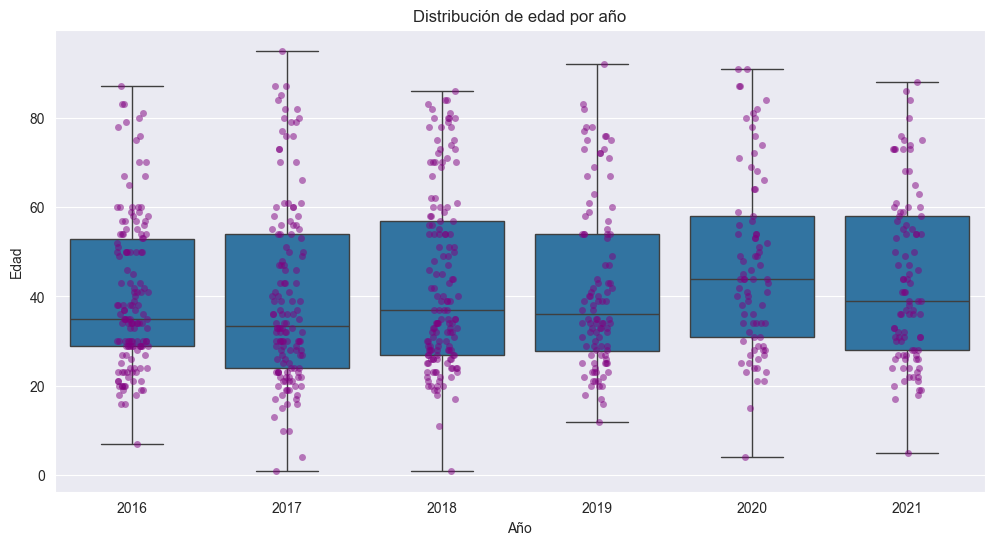

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_homicidios, x="Año", y="Edad")
sns.stripplot(data=df_homicidios, x="Año", y="Edad", color='purple', alpha=0.5)  

plt.title("Distribución de edad por año")
plt.xlabel("Año")
plt.ylabel("Edad")

plt.show()

### Distribución de víctimas por sexo y año.
En el siguiente gráfico se muestra que el número de víctimas por sexo sexo es muy dispar, debido a que la mayoría son de sexo masculino, incluso durante el año 2020 se puede ver que, a pesar de haber disminuido la cantidad de muertes totales de ese año a causa de la pandemia, la proporción de muertes por sexo casi no se vio afectada respecto de otros años.

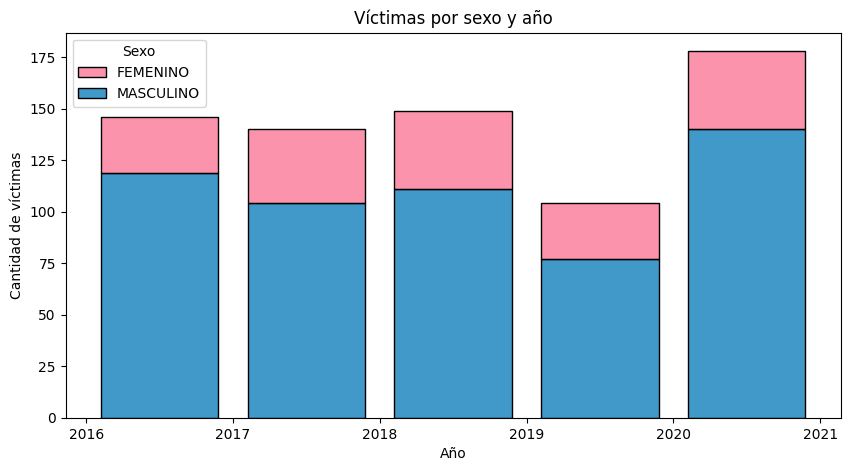

In [5]:
conteo = df_homicidios.groupby(['Sexo', 'Año']).size().reset_index(name='conteo')

plt.figure(figsize=(10, 5))
sns.histplot(data=conteo, x='Año', weights='conteo', hue='Sexo', palette={'MASCULINO': '#0077b6', 'FEMENINO': '#fb6f92'}, multiple='stack', bins=5, shrink=0.8)

plt.title('Víctimas por sexo y año')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')
plt.show()

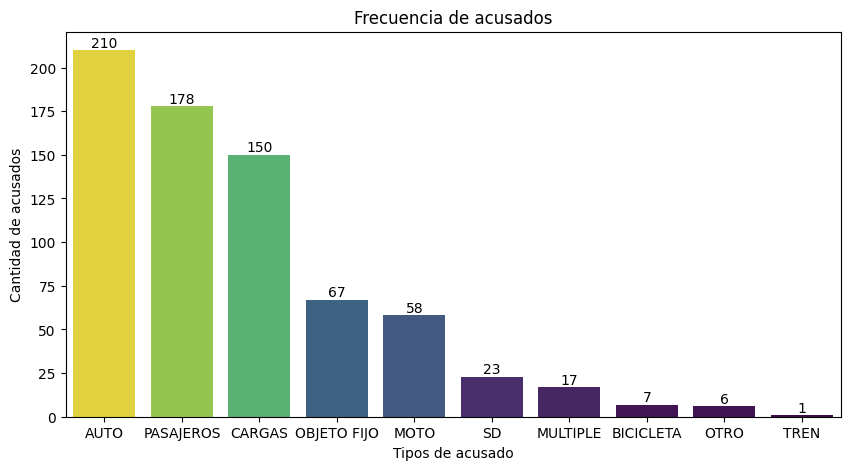

In [6]:
conteo_acusados = df_homicidios['Acusado'].value_counts().reset_index()
conteo_acusados.columns = ['Acusado', 'conteo']

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Acusado', y='conteo', data=conteo_acusados, palette='viridis', hue='conteo', legend=False)

for index, row in conteo_acusados.iterrows():
    barplot.text(index, row['conteo'], row['conteo'], color='black', ha="center", va="bottom")

plt.title('Frecuencia de acusados')
plt.xlabel('Tipos de acusado')
plt.ylabel('Cantidad de acusados')
plt.show()

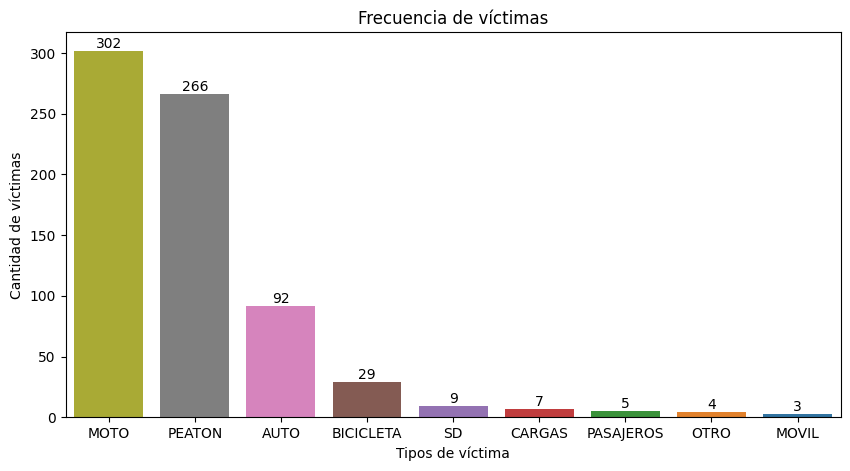

In [7]:
conteo_victimas = df_homicidios['Víctima'].value_counts().reset_index()
conteo_victimas.columns = ['Víctima', 'conteo']

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Víctima', y='conteo', data=conteo_victimas, palette='tab10', hue='conteo', legend=False)

for index, row in conteo_victimas.iterrows():
    barplot.text(index, row['conteo'], row['conteo'], color='black', ha="center", va="bottom")

plt.title('Frecuencia de víctimas')
plt.xlabel('Tipos de víctima')
plt.ylabel('Cantidad de víctimas')
plt.show()

## Siniestros en el marco espacial.

### Siniestros por tipo de calle y comuna.
En los siguientes dos graficos se puede observar la correlación entre la cantidad de accidentes de tránsito en relación al tipo de calle, siendo la categoría "AVENIDA" la predominante en este campo, lo que afecta de manera directa al número de víctimas registradas en las comunas.

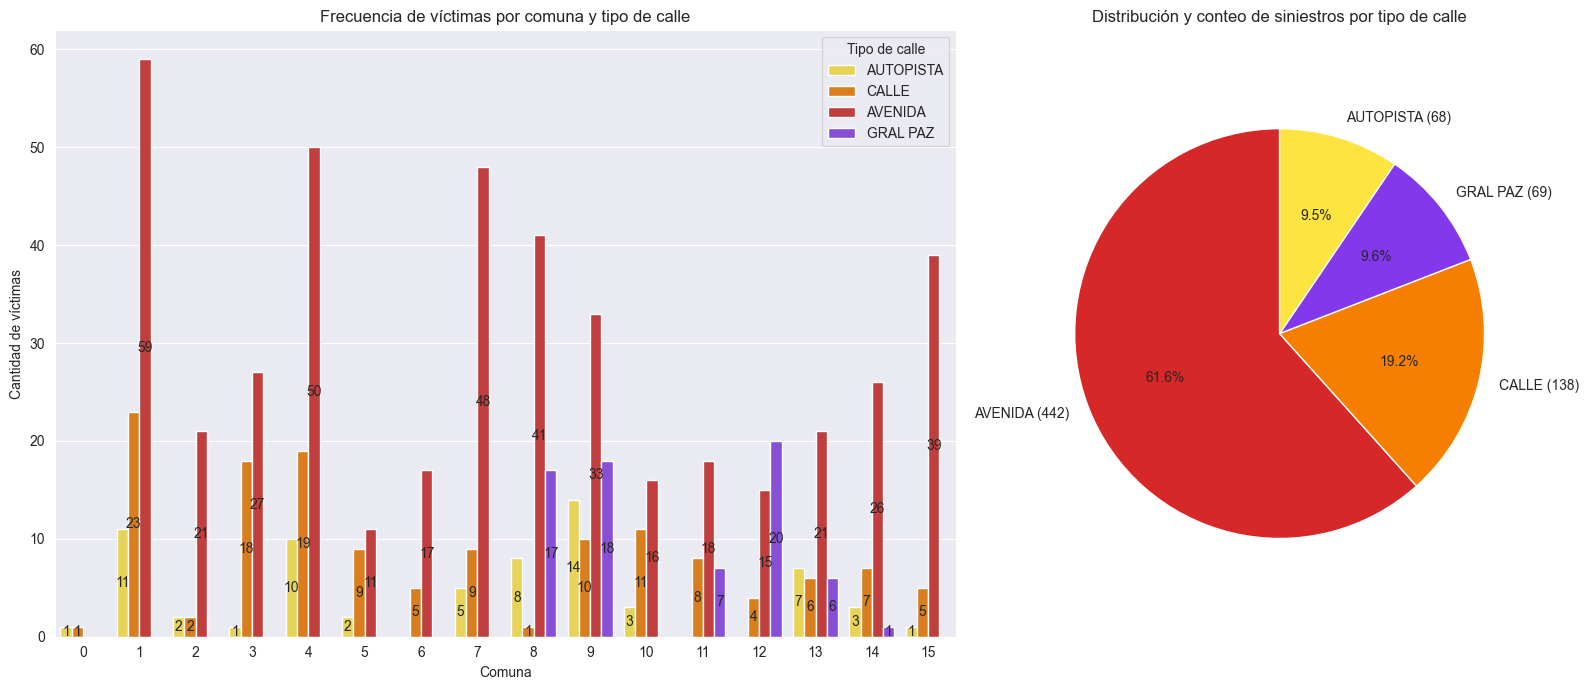

In [77]:
conteo_victimas = df_homicidios.groupby(['Comuna', 'Tipo de calle']).size().reset_index(name='conteo')

calle_counts = df_homicidios['Tipo de calle'].value_counts().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [2, 1]})

barplot = sns.barplot(
    ax=ax1,
    data=conteo_victimas,
    x='Comuna',
    y='conteo',
    hue='Tipo de calle',
    palette={'AVENIDA': '#d62828', 'CALLE': '#f77f00', 'GRAL PAZ': '#8338ec', 'AUTOPISTA': '#fee440'},
    err_kws={'linewidth': 0}
)

for container in barplot.containers:
    barplot.bar_label(container, label_type='center')

ax1.set_title('Frecuencia de víctimas por comuna y tipo de calle')
ax1.set_xlabel('Comuna')
ax1.set_ylabel('Cantidad de víctimas')
ax1.legend(title='Tipo de calle')

labels = calle_counts.index.to_numpy()
counts = calle_counts.values
labels_with_counts = [f"{label} ({count})" for label, count in zip(labels, counts)]

ax2.pie(counts, labels=labels_with_counts, autopct='%1.1f%%', startangle=90, colors=['#d62828', '#f77f00', '#8338ec', '#fee440'])
ax2.axis('equal')
ax2.set_title('Distribución y conteo de siniestros por tipo de calle')

plt.tight_layout()
plt.show()

## Siniestros en el marco temporal.

### Siniestros por momento del día.  
Definimos los siguientes momentos del día:
* Madrugada: 00:00 - 05:59 hs.
* Mañana: 06:00 - 11:59 hs.
* Tarde: 12:00 - 17:59 hs.
* Noche: 18:00 - 23:59 hs.

En este gráfico se puede ver que la mayoría de los accidentes automovilísticos se producen durante el período de la mañana, esto se puede deber al hecho de que durante esto momento la mayoría de la gente se encuentra en un estado de somnolencia y acompañado, generalmente, del apuro de la gente está de camino al trabajo, lo que puede provocar la distracción suficiente para provocar estos hechos.  
Seguido del momento de la mañana, también se puede ver que la noche es uno de los momentos en los que se dan con mayor frecuencia siniestros viales, esto se puede deber al hecho de una reducción en la ilumninación ambiental y, a su vez, es el momento en el que se suelen consumir con mayor frecuencia bebidas alcoholicas.

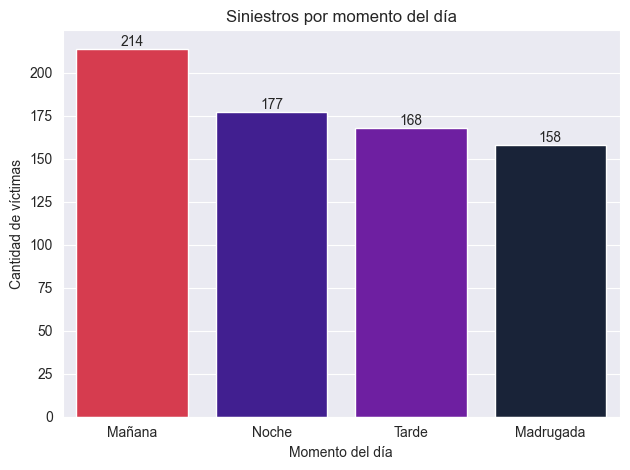

In [27]:
period_counts = df_homicidios['Momento del día'].value_counts()

sns.set_style('darkgrid')
ax = sns.barplot(x=period_counts.index, y=period_counts.values, hue=period_counts.index, palette=['#ef233c', '#3a0ca3', '#7209b7', '#14213d'], legend=False)

for patch in ax.patches:
    y_pos = patch.get_height() + 0.1
    label = f"{int(patch.get_height())}"
    plt.text(patch.get_x() + patch.get_width() / 2, y_pos, label, ha='center', va='bottom', fontsize=10)

plt.xlabel('Momento del día')
plt.ylabel('Cantidad de víctimas')
plt.title('Siniestros por momento del día')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Siniestros por año.

En el siguente diagrama se puede ver la constante de víctimas que hay en los primeros 3 años hasta el inicio de la pandemia por COVID-19, en la cual se muestra un margen aproximado de reducción del 33% para los siguientes 3 años.

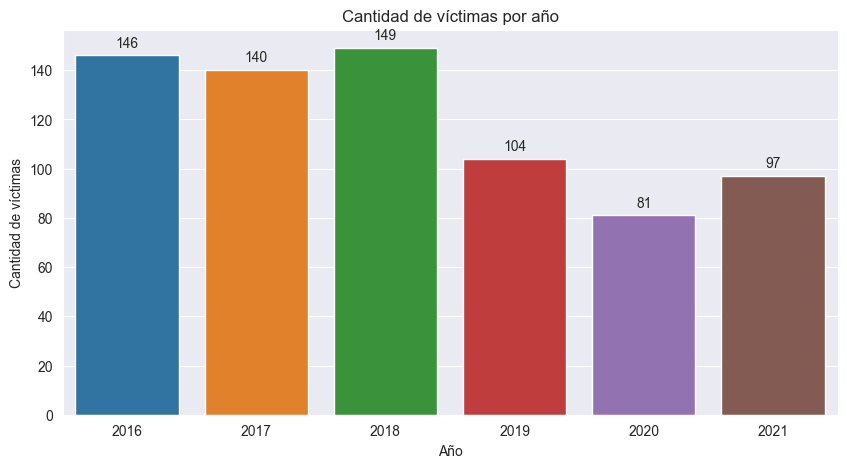

: 

In [78]:
conteo_victimas = df_homicidios['Año'].value_counts().reset_index()
conteo_victimas.columns = ['Año', 'conteo']
conteo_victimas = conteo_victimas.sort_values('Año')

plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    x='Año',
    y='conteo',
    data=conteo_victimas,
    hue='Año',
    palette='tab10',
    legend=False
)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

plt.title('Cantidad de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')
plt.show()

### Siniestros por mes.  
En este gráfico que distingue que los 3 meses con mayor cantidad incidentes viales son **agosto**, **noviembre** y **diciembre**. Se intuye que los mese de **noviembre** y **diciembre** son los meses más colmplicados en este aspecto debio a que son aquellos durante los que se dan las celebraciones de fin de año, lo que provoca que la gente se exponga más a las intoxicación por bebidas alcoholicas. Por otro lado, **agosto** puede ser otro de los meses más líado ya que es uno de los más oscuros del año, lo que puede provocar una reducción de visibilidad a la hora de manejar.

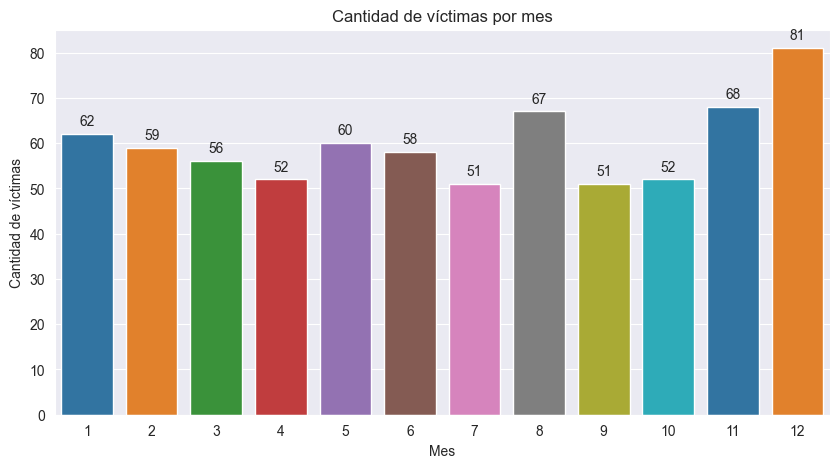

In [36]:
conteo_victimas = df_homicidios['Mes'].value_counts().reset_index()
conteo_victimas.columns = ['Mes', 'conteo']
conteo_victimas = conteo_victimas.sort_values('Mes')

plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Mes', y='conteo', data=conteo_victimas, hue='Mes', palette='tab10', dodge=False, legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.title('Cantidad de víctimas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')
plt.show()


### Siniestros por mensuales por año.
En este gráfico se muestra la progresión mes a mes de cada año de los siniestros ocurridos en el lapso entre 2016 y 2021. Como ya se vislumbró con anterioridad se muestra una tendencia de crecimiento en los accidentes viales durante los meses de agosto, noviembre y diciembre. Asimismos se puede observar que en el período afectado por la Pandemia de COVID-19 se presenta una tendencia de descenso de casos de los accidentes, debido a la poca circulación vehicular que hubo durante ese tiempo.

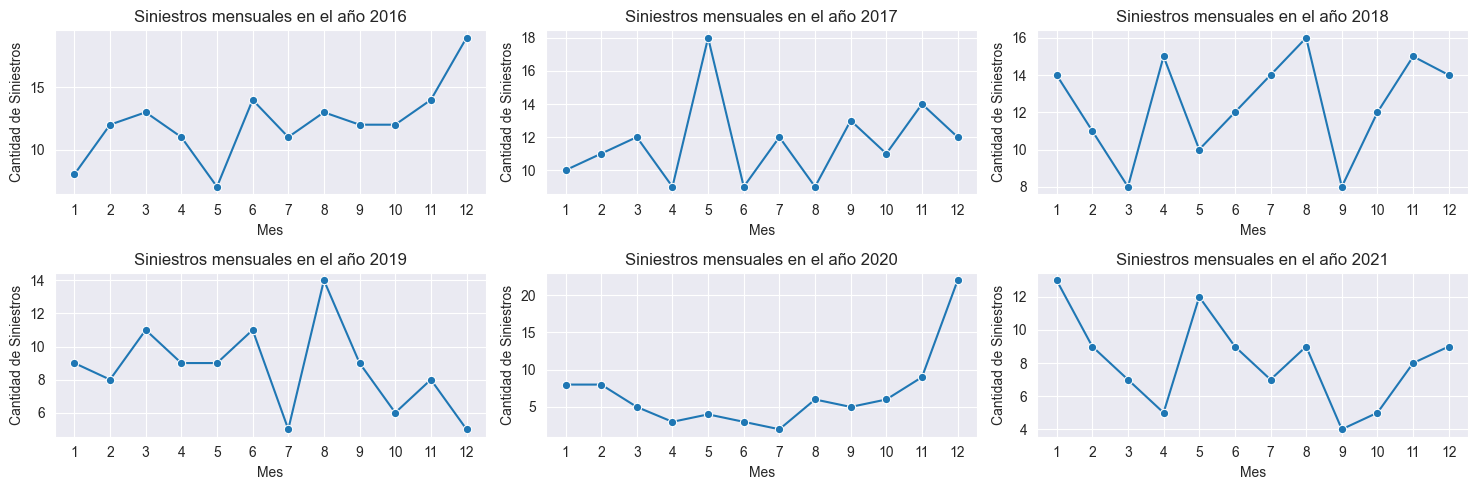

In [29]:
df_homicidios['Mes'] = df_homicidios['Mes'].astype(int)

df_agrupado = df_homicidios.groupby(['Año', 'Mes']).size().reset_index(name='Cantidad de Siniestros')

plt.figure(figsize=(15, 5))

for i, anio in enumerate(df_agrupado['Año'].unique(), start=1):
    plt.subplot(2, 3, i)  
    sns.lineplot(
        data=df_agrupado[df_agrupado['Año'] == anio], 
        x='Mes', 
        y='Cantidad de Siniestros', 
        marker='o'
    )
    plt.title(f"Siniestros mensuales en el año {anio}")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de Siniestros")
    plt.xticks(range(1, 13))

plt.tight_layout()

plt.show()